In [11]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks

# Hierarchicalclu stering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# import all machine learning libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
# from numpy.random import uniform
# from math import
# isnan

# import warnings
import warnings
warnings.filterwarnings('ignore')

import datasist as ds

In [ ]:
m = "I'm ready"
print(m[4:8])

read


In [2]:
data = pd.read_csv("Inequality in Education Africa.csv")
data.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),continent
0,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,Africa
1,BDI,Burundi,Low,SSA,187.0,40.970000,40.970000,36.868090,36.868090,36.868090,36.868090,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210,Africa
2,BEN,Benin,Low,SSA,166.0,NaN,44.792260,44.792260,44.792260,43.656390,43.656390,43.656390,43.693550,43.693550,43.693550,43.693550,43.693550,Africa
3,BFA,Burkina Faso,Low,SSA,184.0,20.966409,20.966409,20.966409,20.966409,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,Africa
4,BWA,Botswana,Medium,SSA,117.0,32.082000,32.082000,32.082000,32.082000,32.082000,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,Africa


In [3]:
# display(data.describe(include=[object, pd.Categorical]).T)

# ds.structdata.describe(data)


In [4]:
data.isna().sum()


ISO3                               0
Country                            0
Human Development Groups           1
UNDP Developing Regions            0
HDI Rank (2021)                    1
Inequality in Education (2010)    18
Inequality in Education (2011)    15
Inequality in Education (2012)    12
Inequality in Education (2013)     9
Inequality in Education (2014)     9
Inequality in Education (2015)     7
Inequality in Education (2016)     7
Inequality in Education (2017)     7
Inequality in Education (2018)     6
Inequality in Education (2019)     5
Inequality in Education (2020)     5
Inequality in Education (2021)     5
continent                          0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),continent
1,BDI,Burundi,Low,SSA,187.0,40.970000,40.970000,36.868090,36.868090,36.868090,36.868090,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210,Africa
3,BFA,Burkina Faso,Low,SSA,184.0,20.966409,20.966409,20.966409,20.966409,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,Africa
4,BWA,Botswana,Medium,SSA,117.0,32.082000,32.082000,32.082000,32.082000,32.082000,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,Africa
5,CAF,Central African Republic,Low,SSA,188.0,34.549600,34.549600,34.549600,34.549600,34.549600,34.549600,34.549600,34.549600,34.549600,35.197850,35.197850,35.197850,Africa
6,CIV,Ivory Coast,Medium,SSA,159.0,43.200000,43.200000,45.111420,45.111420,45.111420,45.111420,45.609040,45.609040,45.609040,45.609040,45.609040,45.609040,Africa


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HDI Rank (2021),33.0,163.030303,21.564561,97.00000,153.00000,166.00000,179.00000,191.00000
Inequality in Education (2010),33.0,34.225344,8.586310,17.82500,27.76500,32.20000,41.86106,48.72300
Inequality in Education (2011),33.0,33.975005,8.514701,17.82500,27.76500,32.08200,40.97000,48.72300
Inequality in Education (2012),33.0,34.016005,8.847898,17.82500,27.76500,34.54960,40.78516,48.72300
Inequality in Education (2013),33.0,33.713595,8.628667,17.82500,26.81536,34.54960,40.78516,48.26536
Inequality in Education (2014),33.0,33.726622,8.969345,17.39521,27.69055,34.92485,41.86106,48.26536
Inequality in Education (2015),33.0,33.673395,9.258919,16.80576,25.01567,35.01448,41.91002,48.26536
Inequality in Education (2016),33.0,33.639346,9.377547,16.80576,25.01567,35.01448,41.91002,48.26536
Inequality in Education (2017),33.0,33.582525,9.308510,16.80576,25.01567,35.10167,40.78516,48.26536
Inequality in Education (2018),33.0,33.437909,9.641810,16.80576,25.01567,35.10167,40.78516,50.12411


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 53
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO3                            33 non-null     object 
 1   Country                         33 non-null     object 
 2   Human Development Groups        33 non-null     object 
 3   UNDP Developing Regions         33 non-null     object 
 4   HDI Rank (2021)                 33 non-null     float64
 5   Inequality in Education (2010)  33 non-null     float64
 6   Inequality in Education (2011)  33 non-null     float64
 7   Inequality in Education (2012)  33 non-null     float64
 8   Inequality in Education (2013)  33 non-null     float64
 9   Inequality in Education (2014)  33 non-null     float64
 10  Inequality in Education (2015)  33 non-null     float64
 11  Inequality in Education (2016)  33 non-null     float64
 12  Inequality in Education (2017)  33 non-null

In [9]:

columns_drop = ['ISO3', 'UNDP Developing Regions','continent', 'Inequality in Education (2010)','Inequality in Education (2011)',
                'Inequality in Education (2012)','Inequality in Education (2013)','Inequality in Education (2014)','Inequality in Education (2015)',]

data.drop(columns=columns_drop, inplace=True)


In [10]:
# data.to_csv('Clean Data.csv', index=False)


In [11]:
data.head()

,Country,Human Development Groups,HDI Rank (2021),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
1,Burundi,Low,187.0,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210
3,Burkina Faso,Low,184.0,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794
4,Botswana,Medium,117.0,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830
5,Central African Republic,Low,188.0,34.549600,34.549600,34.549600,35.197850,35.197850,35.197850
6,Ivory Coast,Medium,159.0,45.609040,45.609040,45.609040,45.609040,45.609040,45.609040


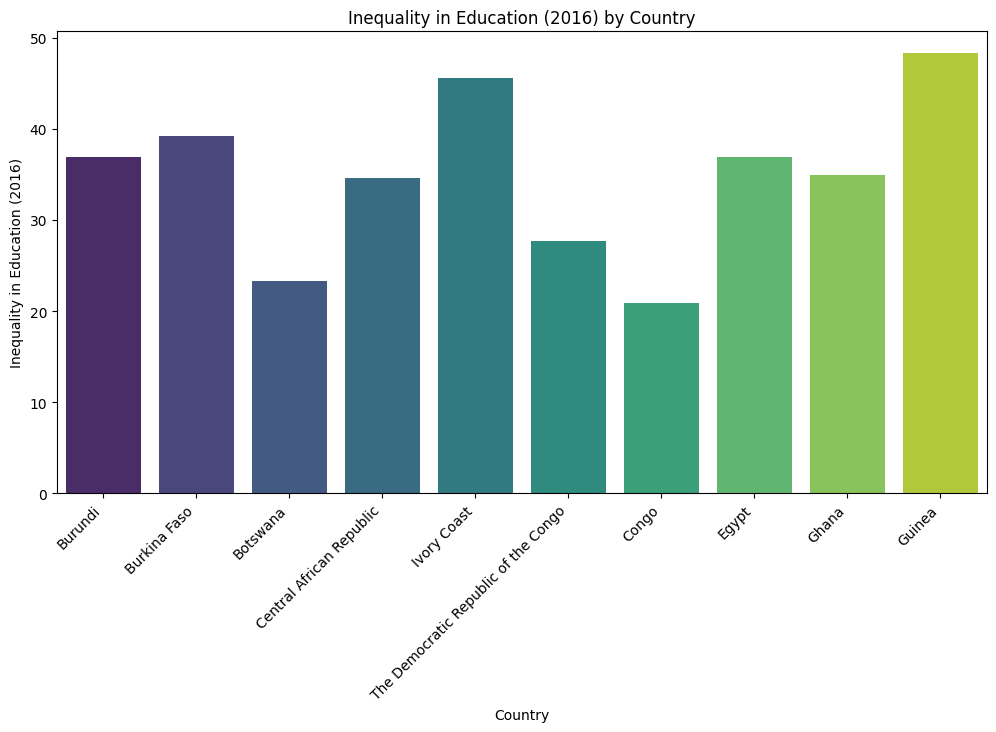

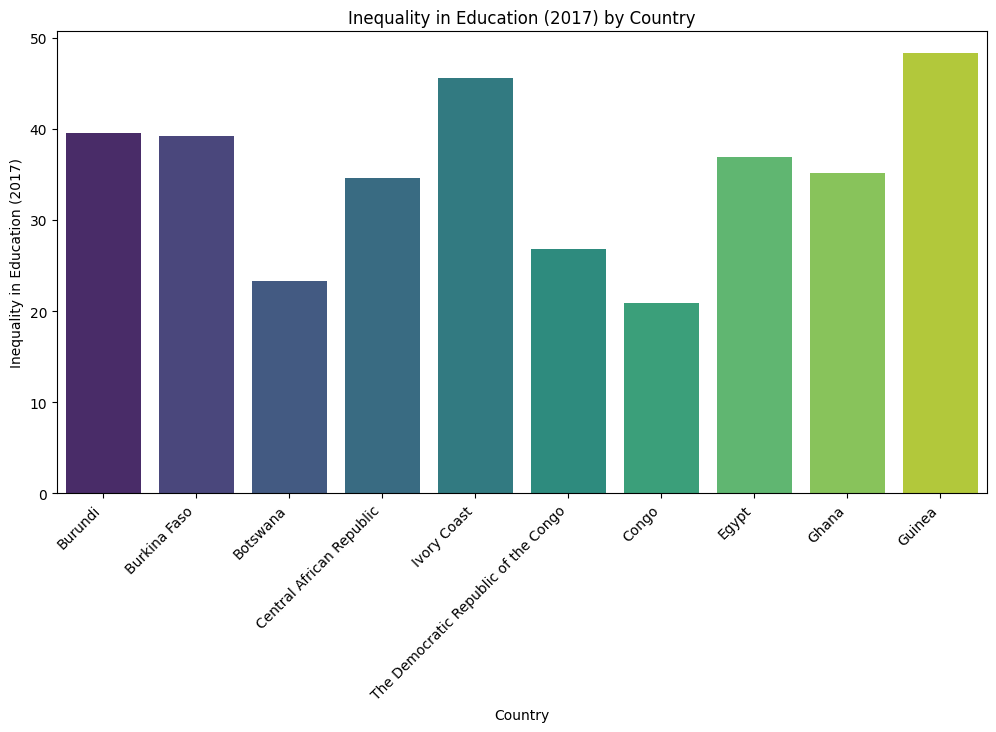

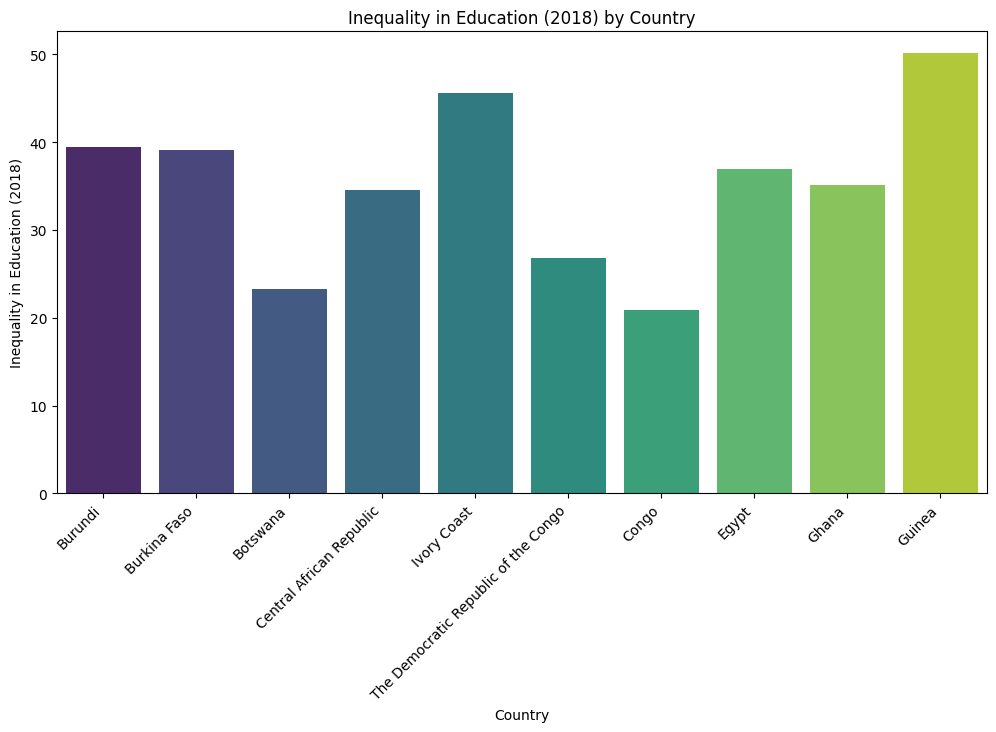

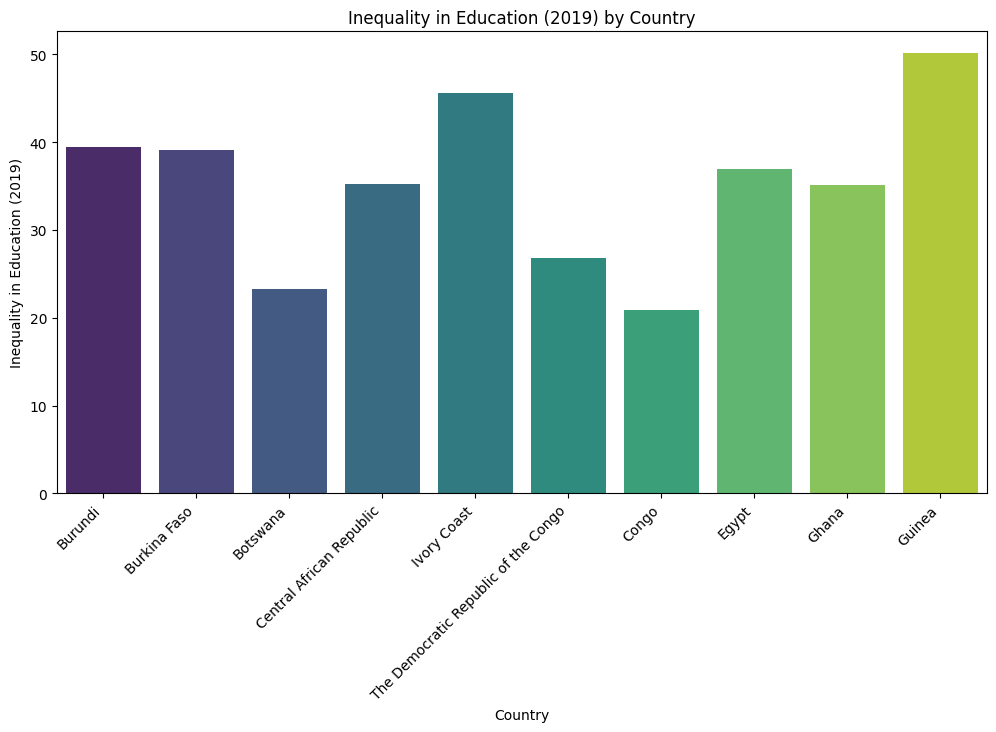

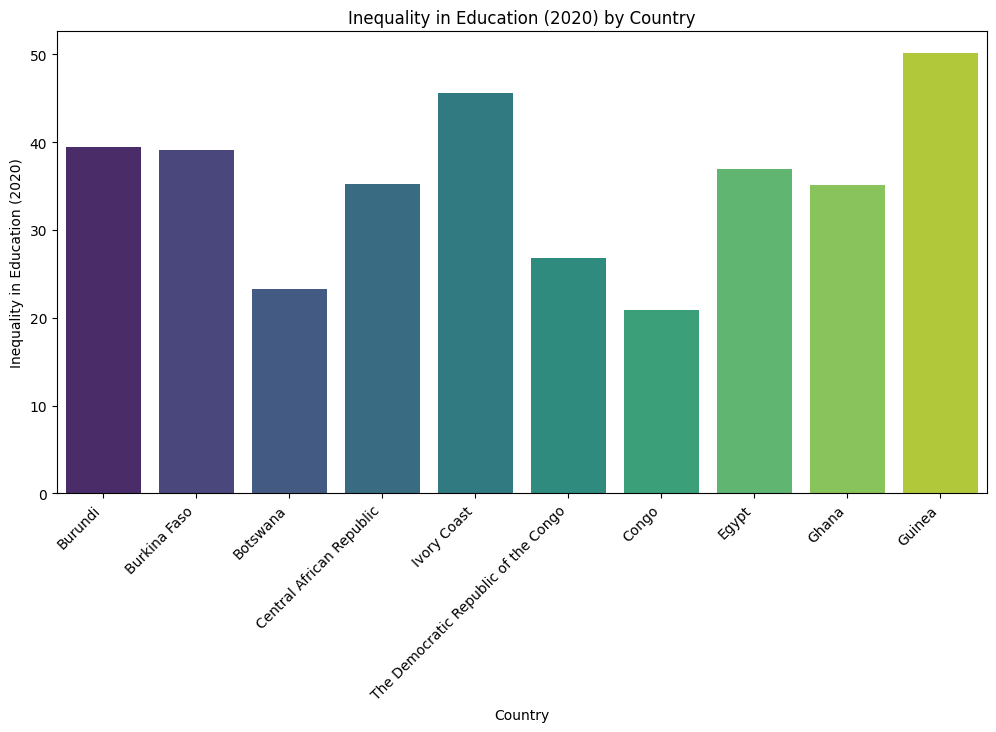

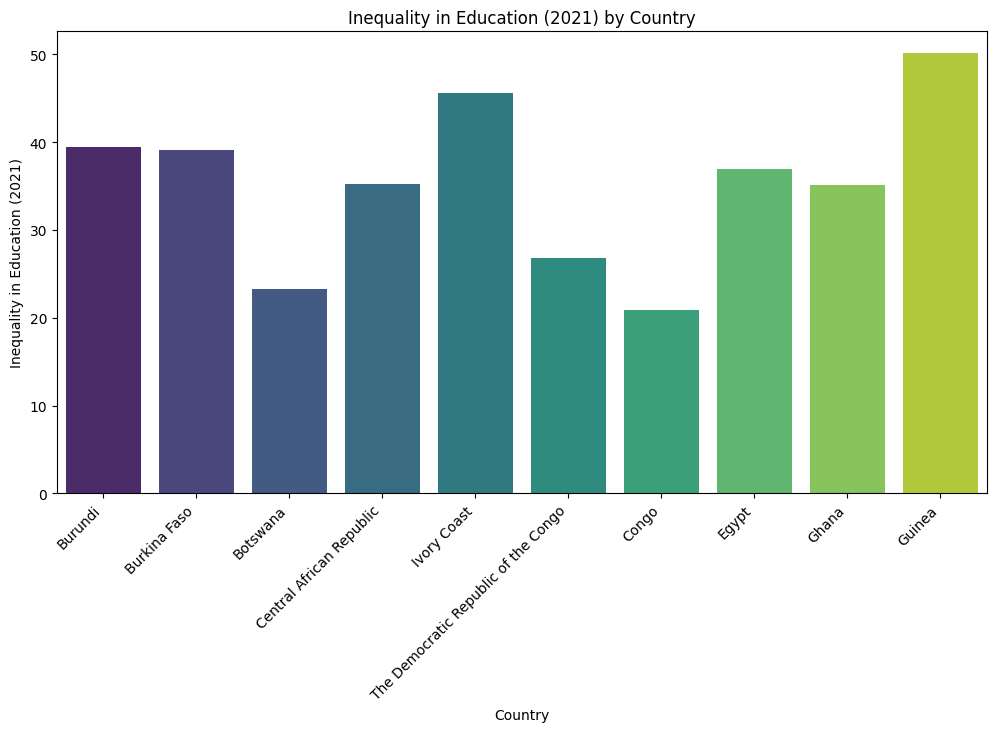

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# 'County' is the column you want to use for the x-axis
# The columns related to inequality in education are specified in 'inequality_columns'
inequality_columns = [
    'Inequality in Education (2016)',
    'Inequality in Education (2017)',
    'Inequality in Education (2018)',
    'Inequality in Education (2019)',
    'Inequality in Education (2020)',
    'Inequality in Education (2021)'
]

# Select the first 10 counties
top_counties = data['Country'].head(10)

# Plot each column against 'County'
for column in inequality_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country', y=column, data=data[data['Country'].isin(top_counties)], palette='viridis')
    plt.title(f'{column} by Country')
    plt.xlabel('Country')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


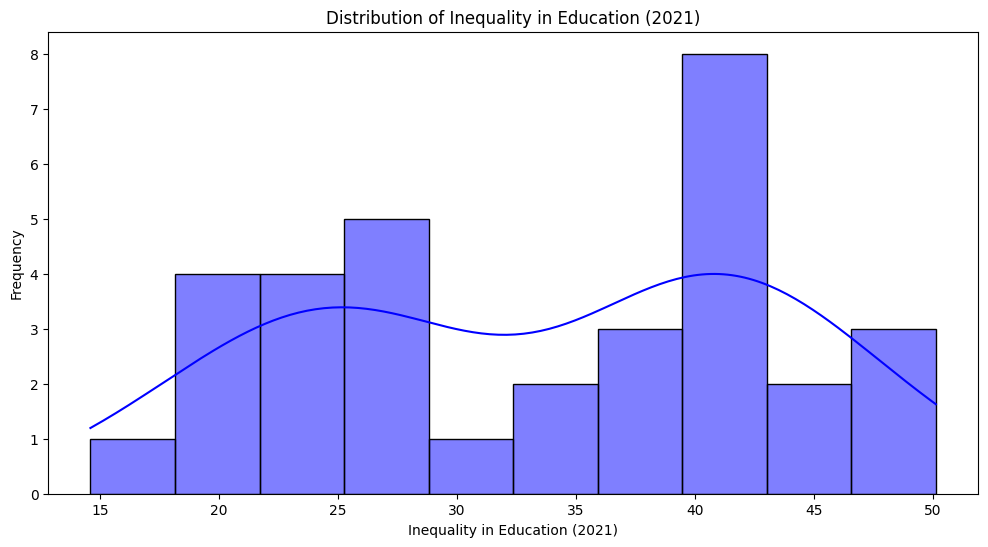

In [13]:
# Distribution of Inequality in Education in 2021

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(data['Inequality in Education (2021)'], kde=True, bins=10, color='blue')
plt.title('Distribution of Inequality in Education (2021)')
plt.xlabel('Inequality in Education (2021)')
plt.ylabel('Frequency')

plt.show()


In [14]:
import plotly.express as px

# Create a melted version of the dataframe for interactive visualization
df_melted = data.melt(id_vars=['Country', 'HDI Rank (2021)','Human Development Groups'],
                     value_vars=['Inequality in Education (2016)', 'Inequality in Education (2017)',
                                 'Inequality in Education (2018)', 'Inequality in Education (2019)',
                                 'Inequality in Education (2020)', 'Inequality in Education (2021)'],
                     var_name='Year', value_name='Inequality in Education')

# Replace the 'Inequality in Education (Year)' with 'Year' in the 'Year' column
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)')

# Create the interactive plot
fig = px.scatter(df_melted, x='HDI Rank (2021)', y='Inequality in Education',
                 color='Human Development Groups',
                 animation_frame='Year',
                 hover_name='Country',
                 range_y=[0, df_melted['Inequality in Education'].max() + 5],
                 title='Inequality in Education vs HDI Rank (2010-2021)',
                 labels={'HDI Rank (2021)': 'HDI Rank (2021)', 'Inequality in Education': 'Inequality in Education'})

fig.update_layout(autosize=False, width=800, height=600)
fig.show()


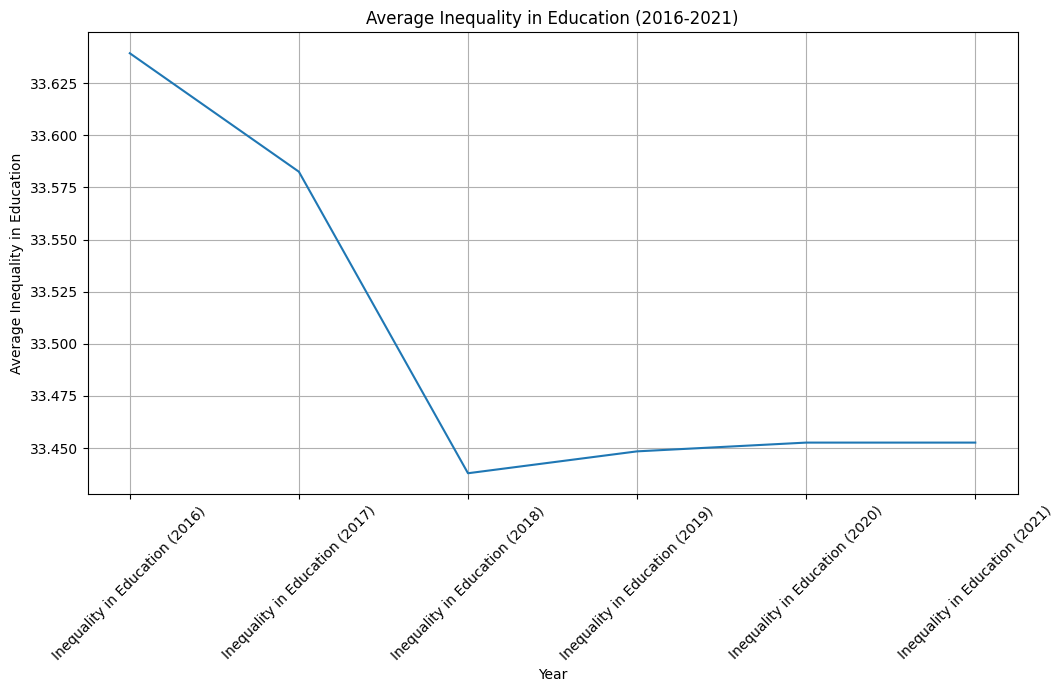

Inequality in Education (2016)    33.639346
Inequality in Education (2017)    33.582525
Inequality in Education (2018)    33.437909
Inequality in Education (2019)    33.448404
Inequality in Education (2020)    33.452608
Inequality in Education (2021)    33.452608
dtype: float64

In [15]:
# Average Inequality in Education for each year from 2010 to 2021
average_inequality_per_year = data.loc[:, 'Inequality in Education (2016)': 'Inequality in Education (2021)'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_inequality_per_year.index, y=average_inequality_per_year.values)
plt.xticks(rotation=45)
plt.title('Average Inequality in Education (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Average Inequality in Education')
plt.grid(True)
plt.show()

average_inequality_per_year



> The line plot shows the average inequality in education for each year from 2016 to 2021. It indicates a gradual decrease in the average inequality in education over this period.

> This suggests that, on average, educational inequality has been decreasing globally over the past decade, although it still remains a significant issue.

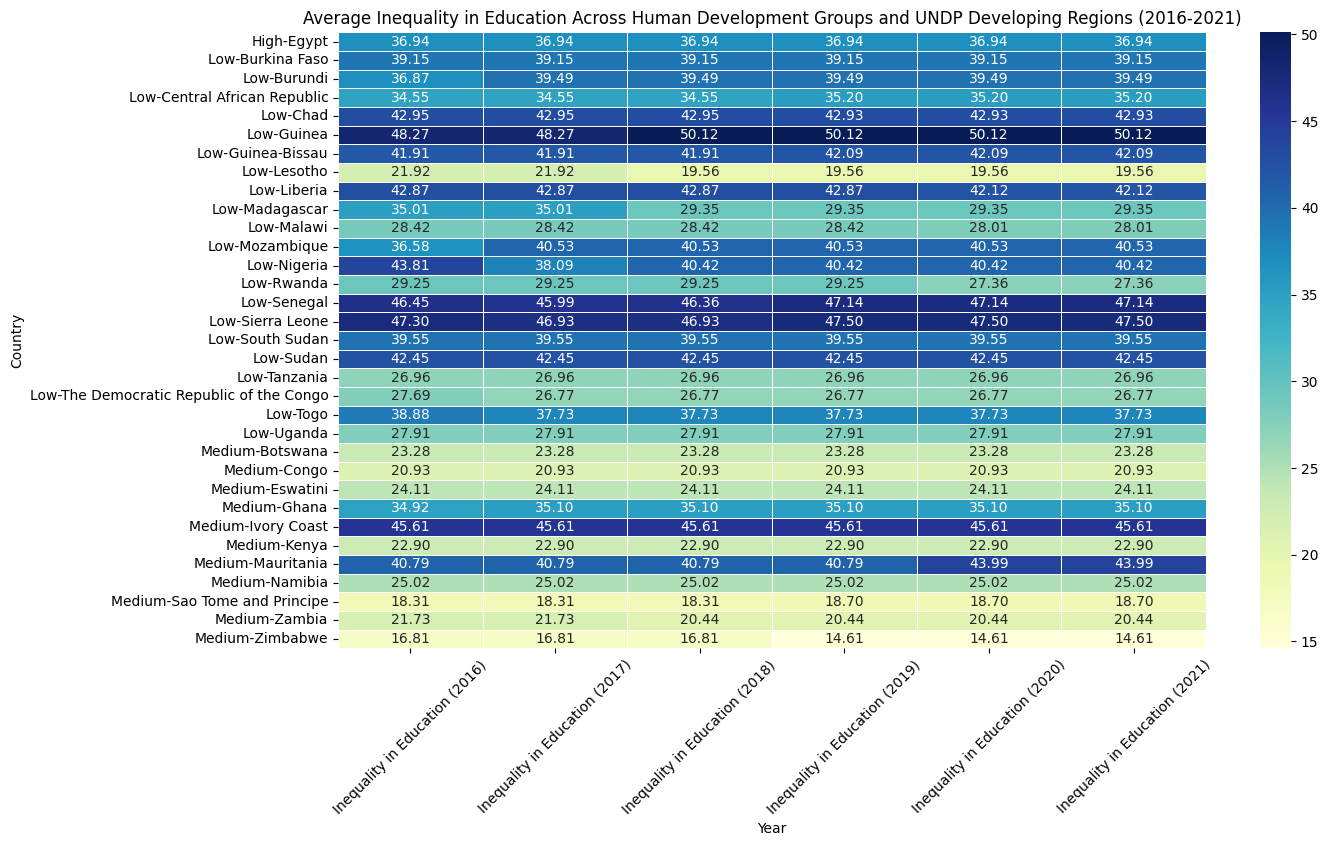

In [16]:
# Average Inequality in Education across different Human Development Groups and UNDP Developing Regions

# Group by Human Development Groups and UNDP Developing Regions and compute the mean
grouped_df = data.groupby(['Human Development Groups', 'Country']).mean()

# Select only the Inequality in Education columns
grouped_inequality_df = grouped_df.loc[:, 'Inequality in Education (2016)': 'Inequality in Education (2021)']

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(grouped_inequality_df, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Average Inequality in Education Across Human Development Groups and UNDP Developing Regions (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


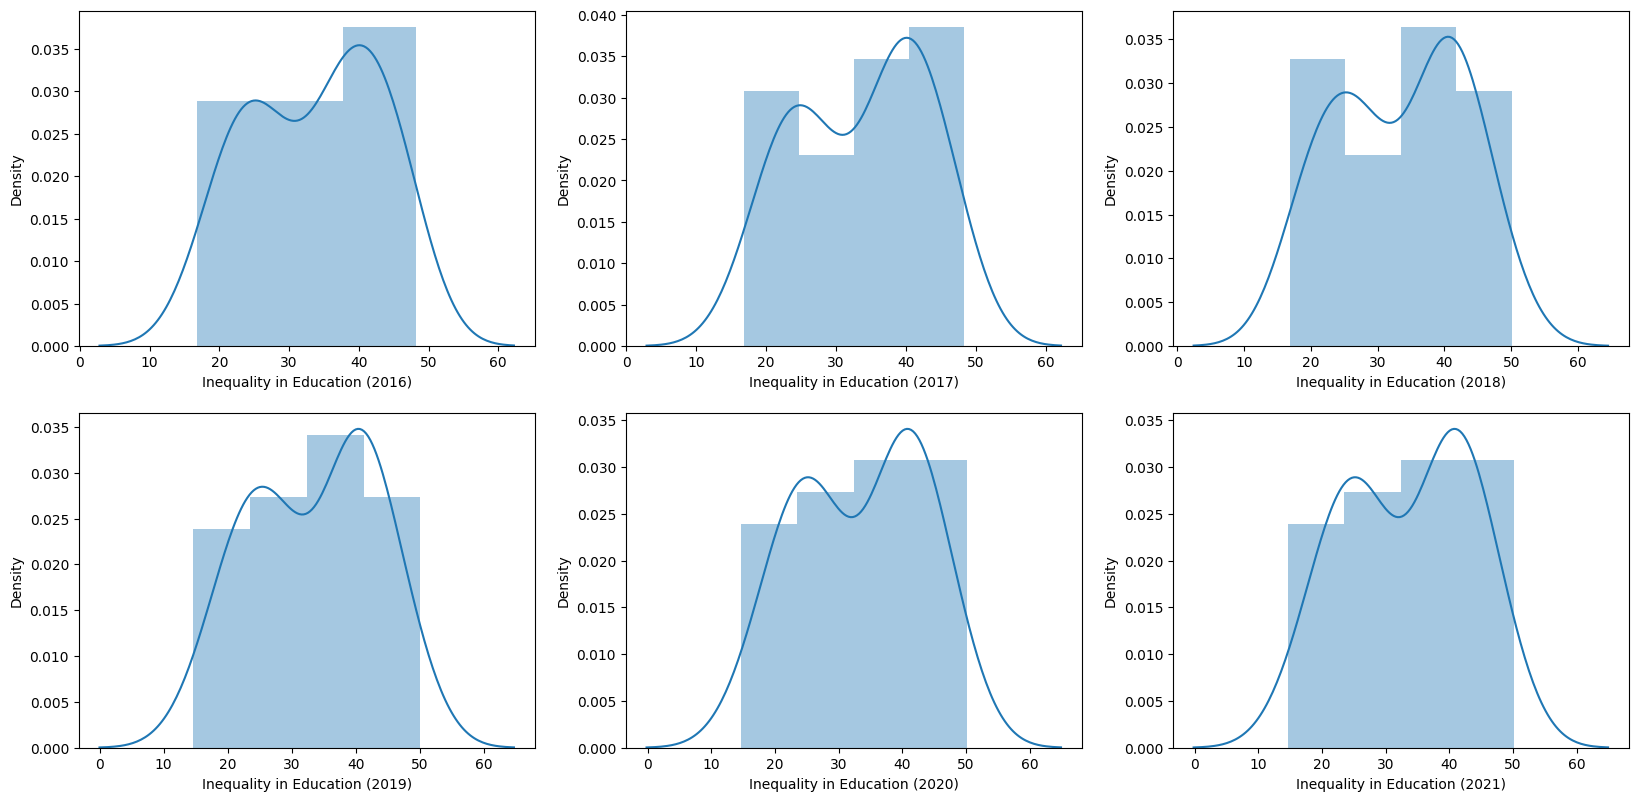

In [20]:
inequality_columns = [
    'Inequality in Education (2016)',
    'Inequality in Education (2017)',
    'Inequality in Education (2018)',
    'Inequality in Education (2019)',
    'Inequality in Education (2020)',
    'Inequality in Education (2021)'
]

plt.figure(figsize = (20,20))
for i in enumerate(inequality_columns):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(data[i[1]])

In [21]:
data.head()

,Country,Human Development Groups,HDI Rank (2021),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
1,Burundi,Low,187.0,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210
3,Burkina Faso,Low,184.0,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794
4,Botswana,Medium,117.0,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830
5,Central African Republic,Low,188.0,34.549600,34.549600,34.549600,35.197850,35.197850,35.197850
6,Ivory Coast,Medium,159.0,45.609040,45.609040,45.609040,45.609040,45.609040,45.609040


In [22]:
columns_drop = ['Country','HDI Rank (2021)','Human Development Groups']
new_df = data.drop(columns=columns_drop)



In [23]:
new_df.head()

,Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
1,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210
3,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794
4,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830
5,34.549600,34.549600,34.549600,35.197850,35.197850,35.197850
6,45.609040,45.609040,45.609040,45.609040,45.609040,45.609040


In [37]:
scaler = StandardScaler()

data_scaled=pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

data_scaled.head()

,Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,0.349644,0.644276,0.637236,0.624958,0.617796,0.617796
1,0.597057,0.607684,0.601909,0.590252,0.583463,0.583463
2,-1.122168,-1.124292,-1.070196,-1.052486,-1.041579,-1.041579
3,0.098572,0.105502,0.117087,0.181021,0.178641,0.178641
4,1.296211,1.312024,1.281901,1.258300,1.244316,1.244316


In [38]:
data_scaled_copy = data_scaled.copy(deep=True)

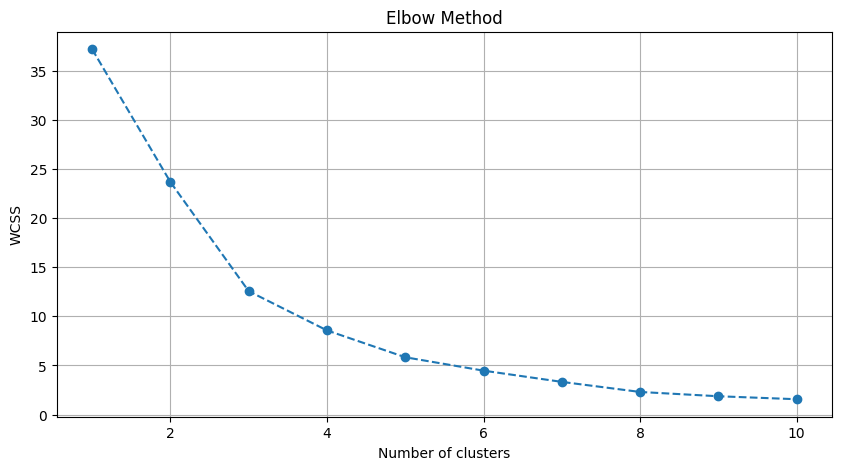

In [39]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)

    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

> The Elbow Method graph shows that the within-cluster Sum of Square (WCSS) starts to decrease more slowly from 3 clusters onwards. Therefore, the optimal number of clusters for this dataset is 3.

In [40]:
# Perform KMeans clustering with 3 clusters

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(new_df)

# Number of countries in each cluster
cluster_counts = data['Cluster'].value_counts()

cluster_counts 



Cluster
1    16
2     9
0     8
Name: count, dtype: int64

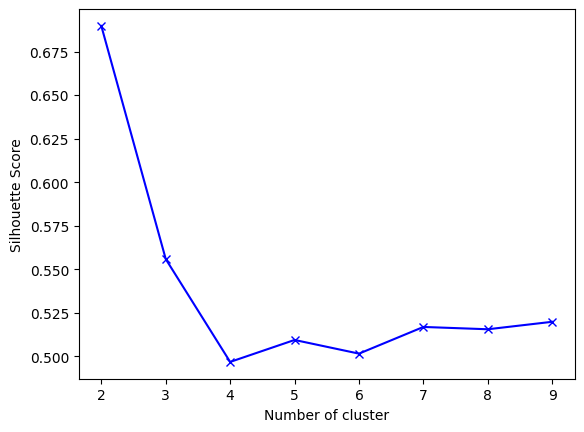

In [42]:
sc = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Add the missing code to generate the Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data ['KMeans_Labels'] = kmeans.predict(data_scaled)

In [44]:
data ['KMeans_Labels'].value_counts()

KMeans_Labels
1    9
2    9
0    8
3    7
Name: count, dtype: int64

In [46]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(new_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6909325175083032
For n_clusters=3, the silhouette score is 0.5559212479341069
For n_clusters=4, the silhouette score is 0.5041058067237042
For n_clusters=5, the silhouette score is 0.5180342345732905
For n_clusters=6, the silhouette score is 0.5056669503684169
For n_clusters=7, the silhouette score is 0.5086885691127976
For n_clusters=8, the silhouette score is 0.5061147892310734
